<a href="https://colab.research.google.com/github/Albert840529/MatSE597_Final_project/blob/main/CT_image_thickness_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect to googel drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Test loading the image and see how it looks like. After Ostu method, got the threshold value.

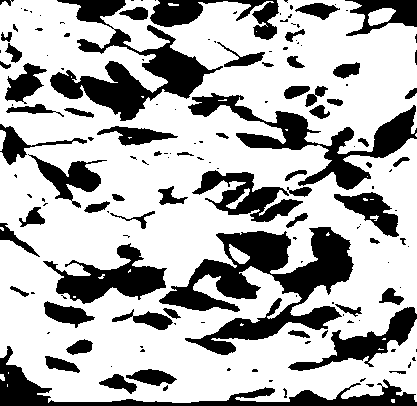

In [53]:
# /content/drive/MyDrive/Colab Notebooks/test/IPP15_10.jpg
import cv2
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/test/Ipp_15_10_crop.jpg", 0)

# Apply Otsu's method to find the threshold value
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the binary image
cv2_imshow(thresh)

Test the code for calculating the aggregate gypsum thickness on one image

In [54]:
import numpy as np

def one_image_thickness(height, width, thresh):
    avg_white_pixels = []
    for w in range(width):
        white_pixels = []
        for h in range(height):
            if thresh[h,w] == 255:
                white_pixels.append(h)
        if len(white_pixels) > 0:
            white_pixels = np.array(white_pixels)
            diff = np.diff(white_pixels)
            continuous = np.where(diff > 1)[0]
            if len(continuous) > 0:
                segments = np.split(white_pixels, continuous + 1)
                lengths = [len(segment) for segment in segments]
                avg_white_pixels.append(sum(lengths) / len(lengths))
            else:
                avg_white_pixels.append(len(white_pixels))
        else:
            avg_white_pixels.append(0)
    return avg_white_pixels

height, width = thresh.shape
avg_white_pixels = one_image_thickness(height, width, thresh)

# Display the average continuous white pixels at each width position
print(avg_white_pixels)
print(np.mean(avg_white_pixels)*7.5, np.std(avg_white_pixels))

[41.125, 36.666666666666664, 40.875, 39.75, 44.714285714285715, 33.55555555555556, 28.9, 19.357142857142858, 22.90909090909091, 25.0, 21.333333333333332, 26.6, 26.9, 33.875, 30.555555555555557, 30.555555555555557, 31.555555555555557, 36.5, 42.857142857142854, 37.0, 32.888888888888886, 29.3, 43.285714285714285, 34.44444444444444, 28.09090909090909, 28.363636363636363, 28.727272727272727, 35.22222222222222, 34.888888888888886, 39.5, 35.111111111111114, 31.7, 39.75, 35.666666666666664, 36.111111111111114, 36.333333333333336, 36.22222222222222, 30.09090909090909, 30.09090909090909, 30.363636363636363, 31.0, 38.666666666666664, 35.2, 31.90909090909091, 31.727272727272727, 34.6, 34.1, 30.545454545454547, 33.9, 33.9, 33.9, 36.888888888888886, 41.25, 41.5, 41.25, 36.333333333333336, 29.09090909090909, 28.181818181818183, 30.2, 30.1, 29.8, 24.666666666666668, 24.666666666666668, 24.5, 26.454545454545453, 26.363636363636363, 20.714285714285715, 22.615384615384617, 20.642857142857142, 23.25, 25.0

# Code for read all image and calculate gypsum thickness for all image, output into csv file. 

In [55]:
import cv2
import numpy as np
import os
import csv

def calculate_thickness(input_dirs, pixel_size=7.5):
    i = 1
    for input_dir in input_dirs:
        print(f'Runnning {i} of {len(input_dirs)} folders')
        print(f'Now working on {input_dir}...............')
         # Define the output directory as the same as input directory
        output_dir = input_dir

        # Define the output CSV file name as the same as the input directory name
        output_file = os.path.join(output_dir, os.path.basename(input_dir) + '.csv')
        # Initialize the output CSV file
        with open(output_file, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['Image Name', 'Average White Pixels', 'Standard Deviation', 'Average Thickness(µm)', 'Standard Deviation of Thickness', 'UTS (MPa)',
                             'Elongation at break (%)', "Young's Modulus (GPa)" ])

        # Loop over all the images in the input directory
        for filename in os.listdir(input_dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                # Load the binary image
                img = cv2.imread(os.path.join(input_dir, filename), 0)
                ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

                # Scan each width position and compute the average continuous white pixels
                height, width = thresh.shape
                avg_white_pixels = one_image_thickness(height, width, thresh)

                # Compute the average and standard deviation of the average continuous white pixels
                avg = np.mean(avg_white_pixels)
                std = np.std(avg_white_pixels)
                avg_thickness = avg * pixel_size
                std_thickness = std * pixel_size
                folder_name = os.path.basename(os.path.normpath(input_dir))
                uts_value = folder_name.split('_')[-3]
                elongation = float(folder_name.split('_')[-1])
                ym = float(folder_name.split('_')[-2])

                # Append the data to the output CSV file
                with open(output_file, 'a', newline='') as csvfile:
                    writer = csv.writer(csvfile)
                    writer.writerow([filename, avg, std, avg_thickness, std_thickness, uts_value, elongation, ym])

        i += 1


In [56]:
def get_folders(path):
    folders = []
    for root, dirs, files in os.walk(path):
        for dir in dirs:
            print(dir)
            folders.append(os.path.join(root, dir))
    return folders

folders = get_folders('/content/drive/MyDrive/Colab Notebooks/MatSE597/Project/test')

IPP_5%_6_0.88_2.22_1.45
R_10_IPP_20%_3_4.46_2.01_1.33


In [57]:
print(len(folders))

2


In [58]:
calculate_thickness(folders)

Runnning 1 of 2 folders
Now working on /content/drive/MyDrive/Colab Notebooks/MatSE597/Project/test/IPP_5%_6_0.88_2.22_1.45...............
Runnning 2 of 2 folders
Now working on /content/drive/MyDrive/Colab Notebooks/MatSE597/Project/test/R_10_IPP_20%_3_4.46_2.01_1.33...............


In [33]:
import cv2
import numpy as np
import os
import csv

def calculate_thickness(input_dirs, pixel_size=7.5):
    i = 1
    for input_dir in input_dirs:
        print(f'Runnning {i} of {len(input_dirs)} folders')
        print(f'Now working on {input_dir}...............')
         # Define the output directory as the same as input directory
        output_dir = input_dir

        # Define the output CSV file name as the same as the input directory name
        output_file = os.path.join(output_dir, os.path.basename(input_dir) + '.csv')
        # Initialize the output CSV file
        with open(output_file, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['Image Name', 'Average White Pixels', 'Standard Deviation', 'Average Thickness(µm)', 'Standard Deviation of Thickness', 'UTS (MPa)',
                             'Elongation at break (%)', "Young's Modulus (GPa)" ])

        # Loop over all the images in the input directory
        for filename in os.listdir(input_dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                # Load the binary image
                img = cv2.imread(os.path.join(input_dir, filename), 0)
                ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

                # Scan each width position and compute the average continuous white pixels
                height, width = thresh.shape
                avg_white_pixels = []
                for w in range(width):
                    white_pixels = []
                    for h in range(height):
                        if thresh[h,w] == 255:
                            white_pixels.append(h)
                    if len(white_pixels) > 0:
                        white_pixels = np.array(white_pixels)
                        diff = np.diff(white_pixels)
                        continuous = np.where(diff > 1)[0]
                        if len(continuous) > 0:
                            segments = np.split(white_pixels, continuous + 1)
                            lengths = [len(segment) for segment in segments]
                            avg_white_pixels.append(sum(lengths) / len(lengths))
                        else:
                            avg_white_pixels.append(len(white_pixels))
                    else:
                        avg_white_pixels.append(0)

                # Compute the average and standard deviation of the average continuous white pixels
                avg = np.mean(avg_white_pixels)
                std = np.std(avg_white_pixels)
                avg_thickness = avg * pixel_size
                std_thickness = std * pixel_size
                folder_name = os.path.basename(os.path.normpath(input_dir))
                uts_value = folder_name.split('_')[-3]
                elongation = float(folder_name.split('_')[-1])
                ym = float(folder_name.split('_')[-2])

                # Append the data to the output CSV file
                with open(output_file, 'a', newline='') as csvfile:
                    writer = csv.writer(csvfile)
                    writer.writerow([filename, avg, std, avg_thickness, std_thickness, uts_value, elongation, ym])

        i += 1

In [ ]:
def get_folders(path):
    folders = []
    for root, dirs, files in os.walk(path):
        for dir in dirs:
            print(dir)
            folders.append(os.path.join(root, dir))
    return folders

folders = get_folders('/content/drive/MyDrive/Colab Notebooks/MatSE597/Project/Images/test')

IPP_5%_6_0.88
IPP_5%_8_0.97
R_10_IPP_20%_3_4.46


In [ ]:
print(len(folders))

3


In [34]:
calculate_thickness(folders)

Runnning 1 of 2 folders
Now working on /content/drive/MyDrive/Colab Notebooks/MatSE597/Project/test/IPP_5%_6_0.88_2.22_1.45...............
Runnning 2 of 2 folders
Now working on /content/drive/MyDrive/Colab Notebooks/MatSE597/Project/test/R_10_IPP_20%_3_4.46_2.01_1.33...............
